In [1]:
import warnings
warnings.simplefilter("ignore")

#  <font color='#FF0000'> Práctica 4. Sensado Fisiológico    </font>
# Estrés
##  <font color='#e0101e '> Realizado por: Ixchel Dafne Avendaño Pacheco  </font>
### Matricula: 23265456

Se nos presenta un conjuntos de datos que corresponden a señales de HRV de 7 sujetos distintos que han sido sometidos a estrés. 

Importamos las librerias necesarias 

In [2]:
import heartpy as hp
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np

Cargamos los archivos 

In [3]:
data1 = hp.get_data('data/DAFNE.txt')
data2 = hp.get_data('data/ARIANA.txt')
data3 = hp.get_data('data/ANDRES.txt')
data4 = hp.get_data('data/JESUS.txt')
data5 = hp.get_data('data/RACHEL.txt')
data6 = hp.get_data('data/SCARLETT.txt')
data7 = hp.get_data('data/JUAN.txt')

#   <font color='#FF0000'> Análisis Exploratorio   </font>

Graficamos las siete señales, para observar su comportamiento 

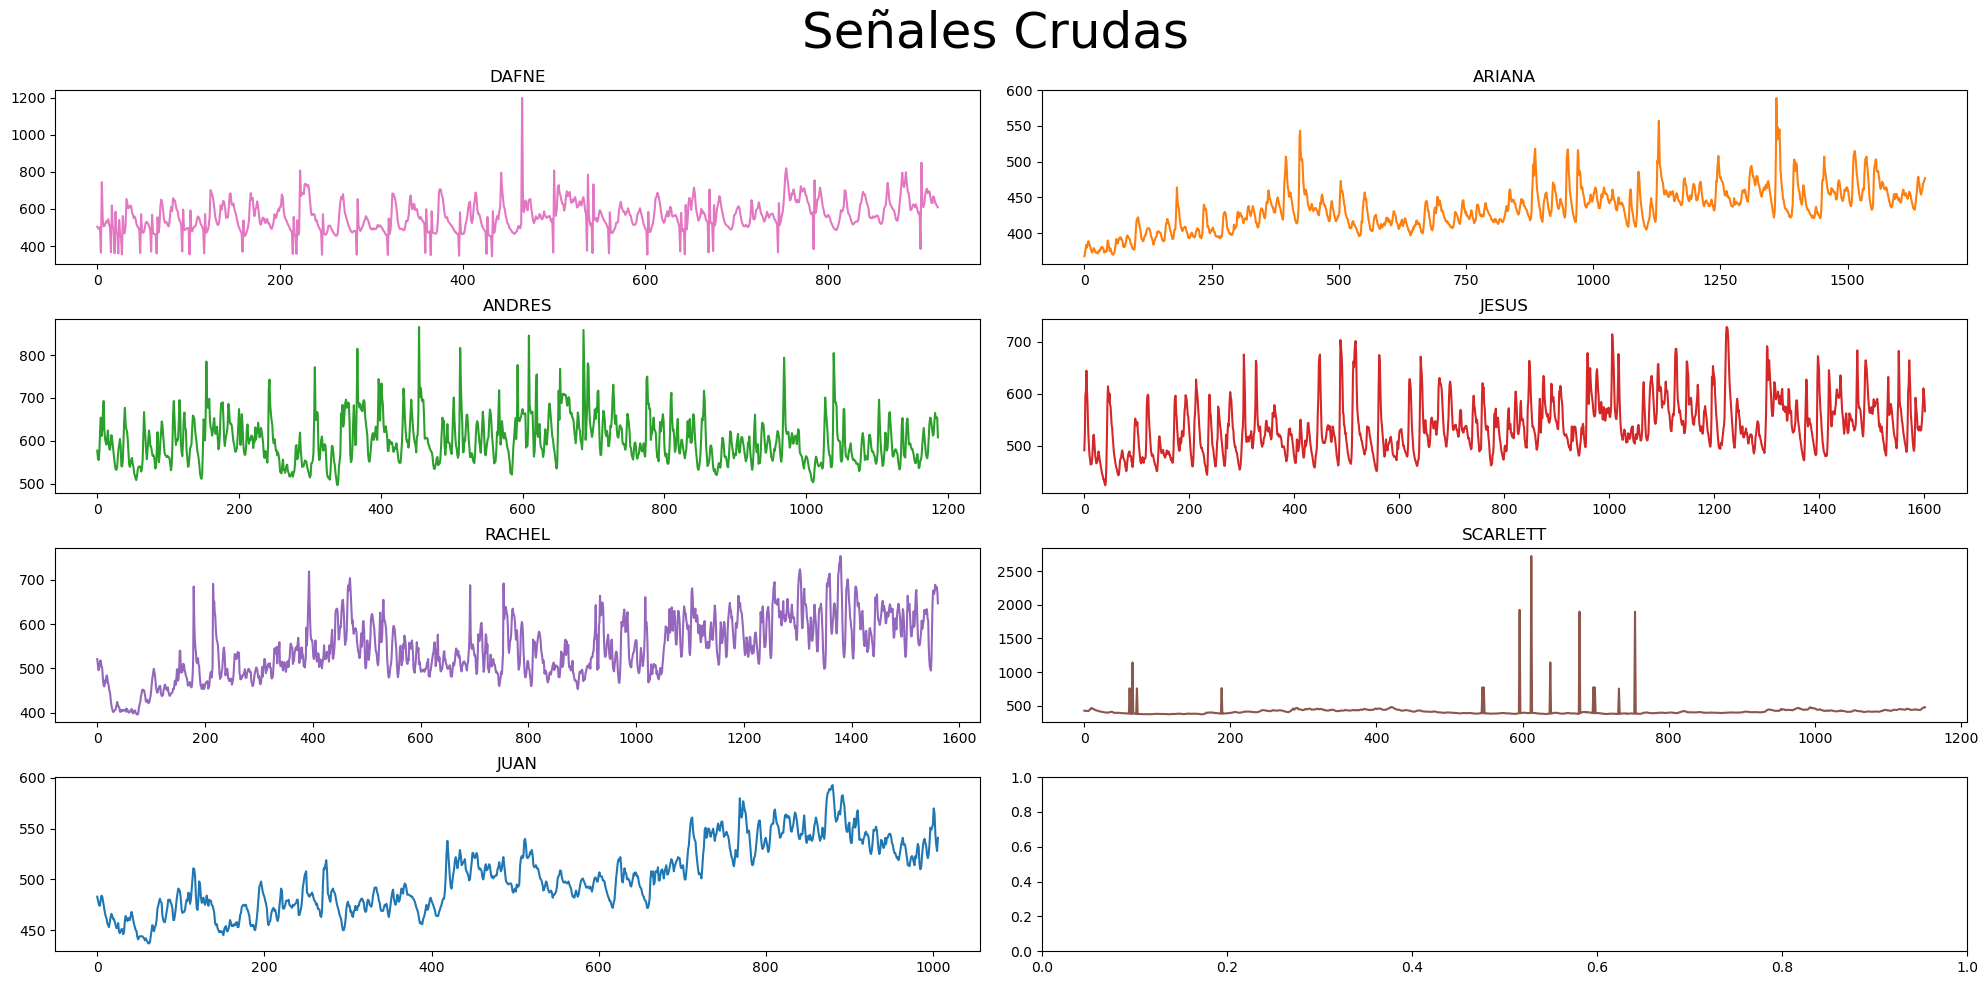

In [5]:
# Crear un subplot de 2 columnas y 4 filas
fig, axs = plt.subplots(4, 2, figsize=(20, 10))

# Asignar datos a cada subplot
axs[0, 0].plot(data1, 'tab:pink')
axs[0, 0].set_title('DAFNE')

axs[0, 1].plot(data2, 'tab:orange')
axs[0, 1].set_title('ARIANA')

axs[1, 0].plot(data3, 'tab:green')
axs[1, 0].set_title('ANDRES')

axs[1, 1].plot(data4, 'tab:red')
axs[1, 1].set_title('JESUS')

axs[2, 0].plot(data5, 'tab:purple')
axs[2, 0].set_title('RACHEL')

axs[2, 1].plot(data6, 'tab:brown')
axs[2, 1].set_title('SCARLETT')

axs[3, 0].plot(data7, 'tab:blue')
axs[3, 0].set_title('JUAN')


# Ajustar espaciado
plt.tight_layout()


# Agregar un título global
fig.suptitle('Señales Crudas', fontsize=36)

# Ajustar el espaciado para el título global
plt.subplots_adjust(top=0.9)

# Mostrar el plot
plt.show()

Observamos que en general las siete señales son muy distintas entre sí. Ya que tienen distintas duraciones y las amplitudes son variantes entre ellas. Observamos además que la señal que corresponde a la medición de Scarlett tiene un comportamiento bastante inusual, esto se puede deber a una mala adquisición o un mal posicionamiento del sensor.

Obsevemos ahora una ventana de tiempo para poder apreciar con mayor detalle las señales.

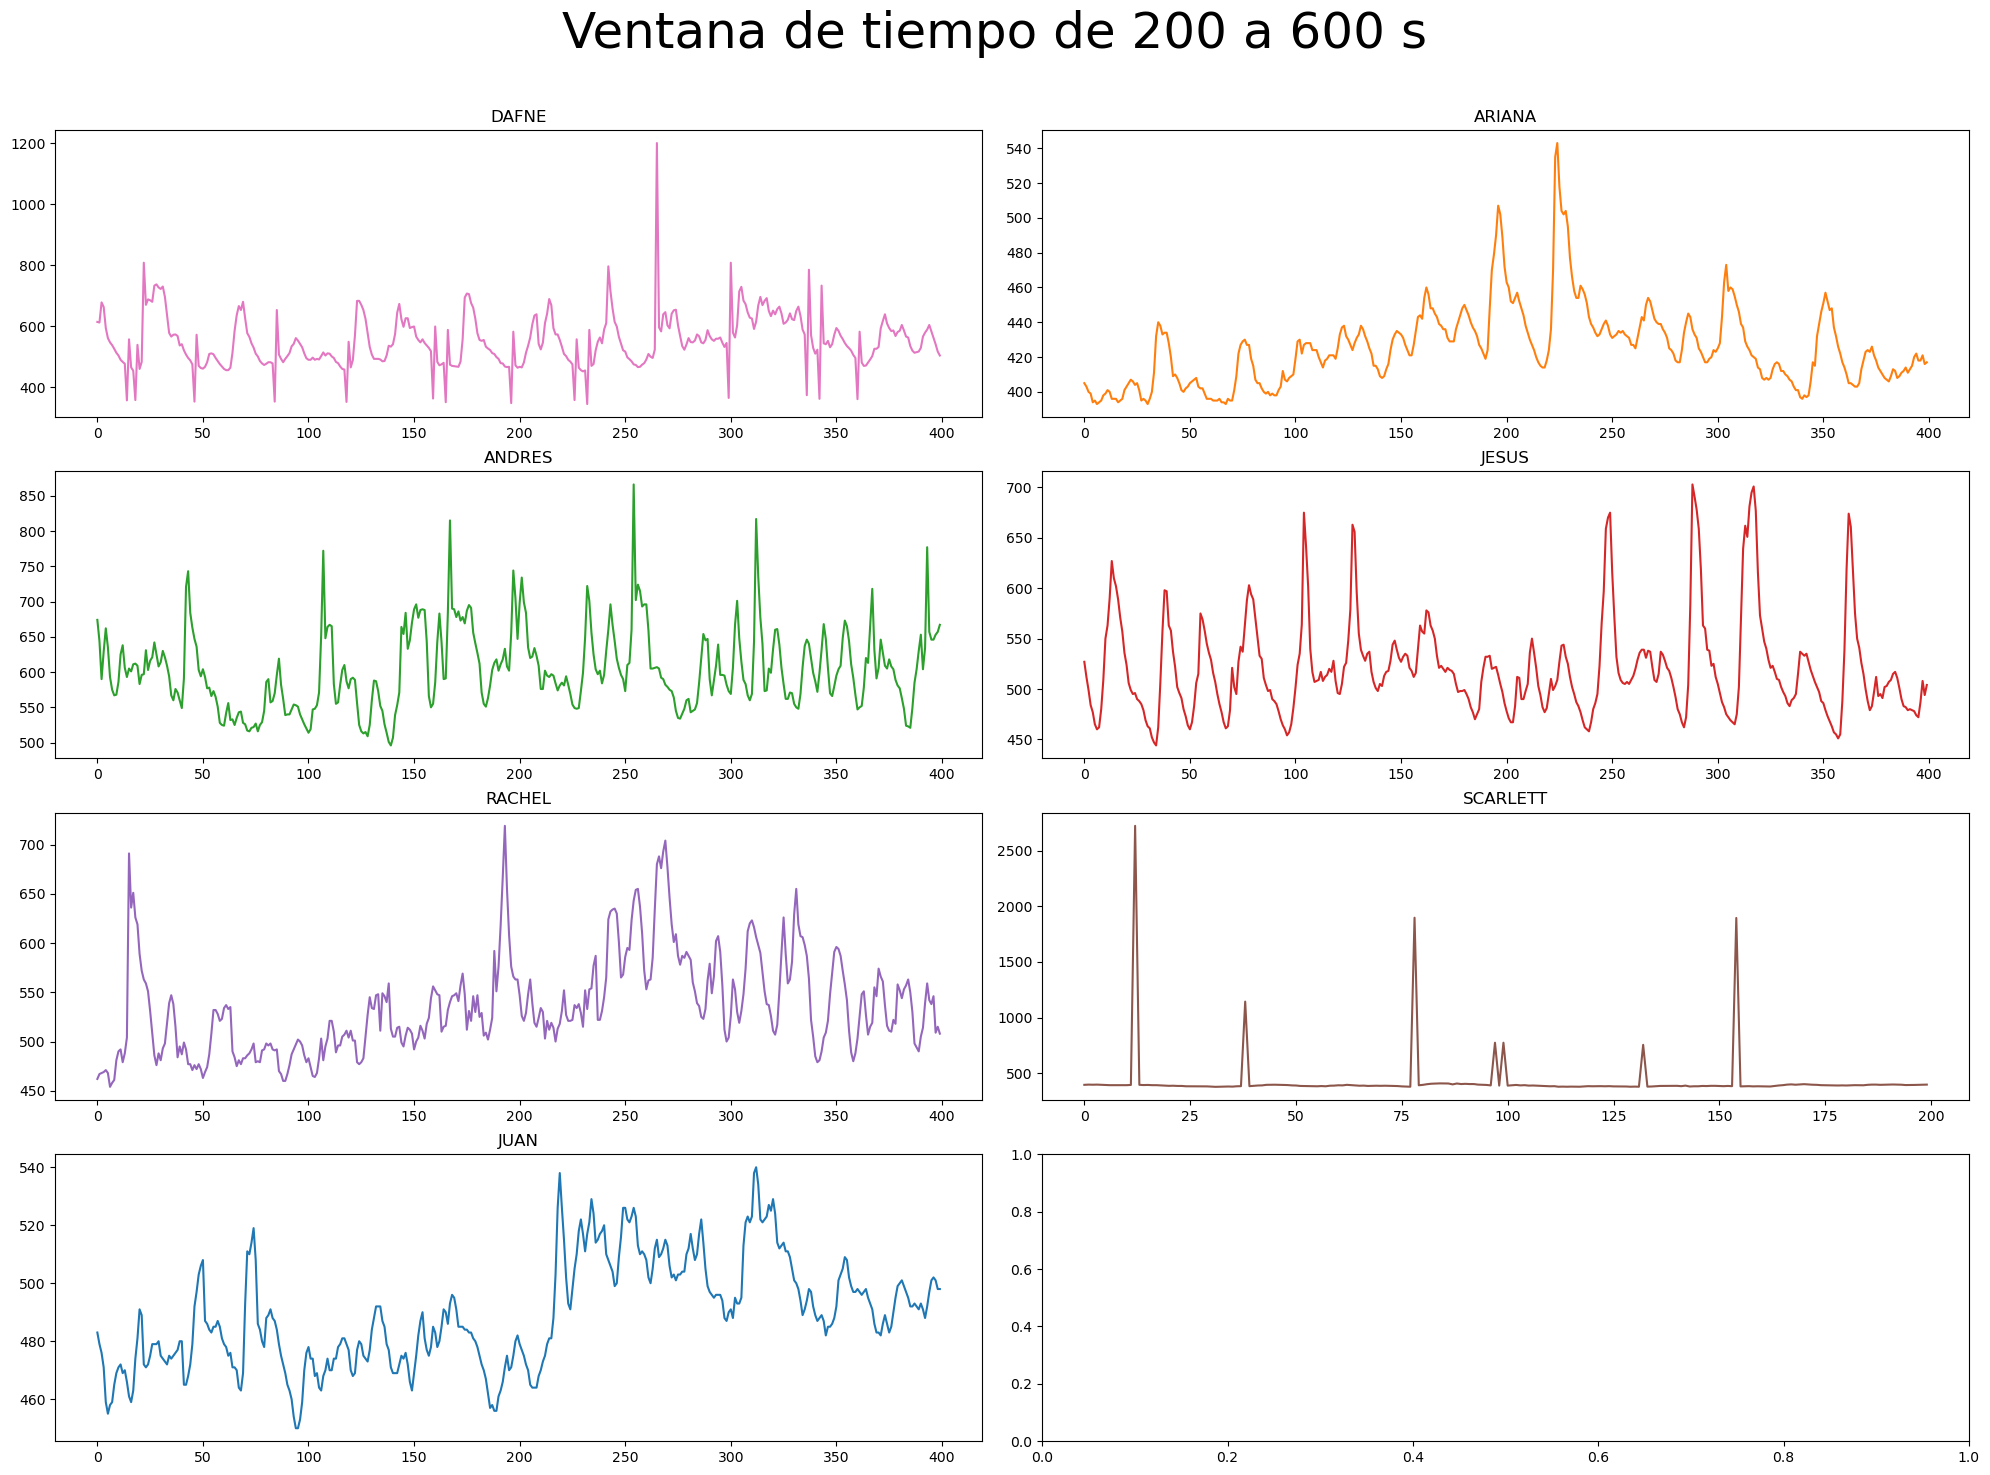

In [6]:
# Crear un subplot de 3 columnas y 2 filas
fig, axs = plt.subplots(4, 2, figsize=(20, 15))

# Establecer el rango de visualización del eje x para hacer zoom 
zoom_range = slice(200, 700)

# Asignar datos a cada subplot y aplicar zoom
axs[0, 0].plot(data1[200:600], 'tab:pink')
axs[0, 0].set_title('DAFNE')

axs[0, 1].plot(data2[200:600], 'tab:orange')
axs[0, 1].set_title('ARIANA')

axs[1, 0].plot(data3[200:600], 'tab:green')
axs[1, 0].set_title('ANDRES')

axs[1, 1].plot(data4[200:600], 'tab:red')
axs[1, 1].set_title('JESUS')

axs[2, 0].plot(data5[200:600], 'tab:purple')
axs[2, 0].set_title('RACHEL')

axs[2, 1].plot(data6[600:800], 'tab:brown')
axs[2, 1].set_title('SCARLETT')

axs[3, 0].plot(data7[200:600], 'tab:Blue')
axs[3, 0].set_title('JUAN')


# Ajustar espaciado
plt.tight_layout()

# Agregar un título global
fig.suptitle('Ventana de tiempo de 200 a 600 s', fontsize=36)

# Ajustar el espaciado para el título global
plt.subplots_adjust(top=0.9)

# Mostrar el plot
plt.show()

Tabla 1. Amplitud Máxima

|Sujeto|Amp Máxima|Duración|
|------|---------------|--------|
|DAFNE|   1200|1000|
|ARIANA|   600|1750|
|ANDRES|   850|1200|
|JESUS|   700|1600|
|RACHEL|   700|1600|
|SCARLETT|   2500|1200|
|JUAN|   600|1000|

Podemos observar que en el caso de la señal correspondiente a Dafne se presenta un pico que llega a una amplitud máxima de 1200, podemos considerar este pico como un outlier ya que no se repite este comportamiento de nuevo, además la señal presenta un comportamiento pareceido en todo el barrido de tiempo a diferencia de dicho pico. Por lo que eliminando el pico máximo podemos determinar que la amplitud máxima corresponde a 800. 

En el caso de la señal correpondeinte observamos que se presentaron dos picos máximos, pero al realizar el análisis con el reso de los pico podemos observar que estos pico fluyen con el resto de la señal, por lo que se tomaran como valores normales. Estos picos nos pueden indicar que en esos periodos de tiempo se dió un cambio en la frecuencia cardiaca, el cual fue bastante importante en magnitud.

Por el contrario, en el caso de antonio podemos observar una región en donde la amplitud se redujo considerablemente respecto el resto de la señal, de manera similar ocurre con la señal que corresponde a Juan. Lo que nos puede indicar que se presentaron eventos donde la frecuencia cardiaca disminuyó, esto se puede deberse a un sentir de calma o a algun ajuste en el ritmo de la respiración 

Con este acercamiento queda más claro que la señal de Scarlett no contiene información relevante sobre el comportamiento cardiaco.


#   <font color='#FF0000'> Filtrado de la señal</font>

A continuación, se presenta el filtrado de las señales. Se emplea un filtro rechazabanda con frecuencia de corte de 0.05. 
Esto nos ayuda a eliminar el comportamiento ascendente que presentan señales como las de Juan o Jesus. 

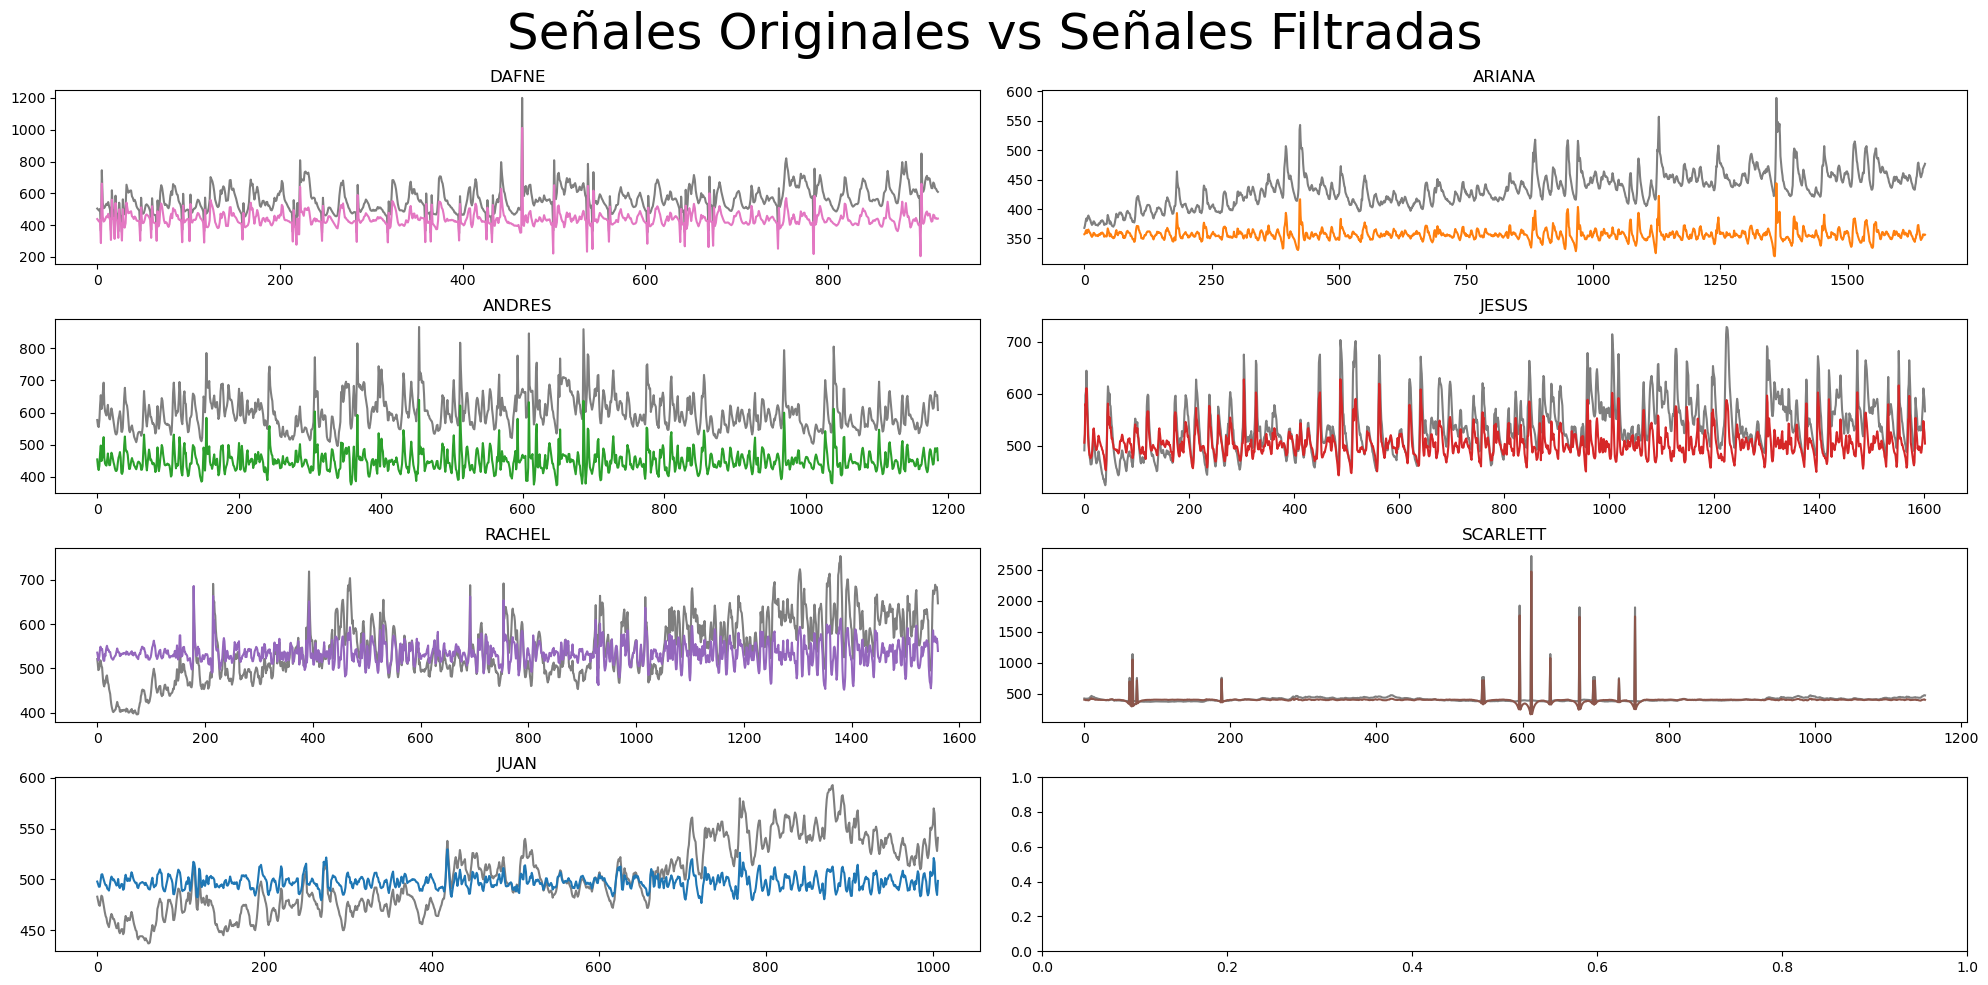

In [7]:
sample_rate = 250

filtered1 = hp.filter_signal(data1, cutoff = 0.05, sample_rate = sample_rate, filtertype='notch')
filtered2 = hp.filter_signal(data2, cutoff = 0.05, sample_rate = sample_rate, filtertype='notch')
filtered3 = hp.filter_signal(data3, cutoff = 0.05, sample_rate = sample_rate, filtertype='notch')
filtered4 = hp.filter_signal(data4, cutoff = 0.05, sample_rate = sample_rate, filtertype='notch')
filtered5 = hp.filter_signal(data5, cutoff = 0.05, sample_rate = sample_rate, filtertype='notch')
filtered6 = hp.filter_signal(data6, cutoff = 0.05, sample_rate = sample_rate, filtertype='notch')
filtered7 = hp.filter_signal(data7, cutoff = 0.05, sample_rate = sample_rate, filtertype='notch')


# Crear un subplot de 2 columnas y 4 filas
fig, axs = plt.subplots(4, 2, figsize=(20, 10))

# Asignar datos a cada subplot
axs[0, 0].plot(data1, 'tab:gray', label = 'original signal')
axs[0, 0].plot(filtered1, 'tab:pink', label = 'filtered signal')
axs[0, 0].set_title('DAFNE')

axs[0, 1].plot(data2, 'tab:gray', label = 'original signal')
axs[0, 1].plot(filtered2, 'tab:orange', label = 'filtered signal')
axs[0, 1].set_title('ARIANA')

axs[1, 0].plot(data3, 'tab:gray', label = 'original signal')
axs[1, 0].plot(filtered3, 'tab:green', label = 'filtered signal')
axs[1, 0].set_title('ANDRES')

axs[1, 1].plot(data4, 'tab:gray', label = 'original signal')
axs[1, 1].plot(filtered4, 'tab:red', label = 'filtered signal')
axs[1, 1].set_title('JESUS')

axs[2, 0].plot(data5, 'tab:gray', label = 'original signal')
axs[2, 0].plot(filtered5, 'tab:purple', label = 'filtered signal')
axs[2, 0].set_title('RACHEL')

axs[2, 1].plot(data6, 'tab:gray', label = 'original signal')
axs[2, 1].plot(filtered6, 'tab:brown', label = 'filtered signal')
axs[2, 1].set_title('SCARLETT')

axs[3, 0].plot(data7, 'tab:gray', label = 'original signal')
axs[3, 0].plot(filtered7, 'tab:blue', label = 'filtered signal')
axs[3, 0].set_title('JUAN')


# Ajustar espaciado
plt.tight_layout()


# Agregar un título global
fig.suptitle('Señales Originales vs Señales Filtradas', fontsize=36)

# Ajustar el espaciado para el título global
plt.subplots_adjust(top=0.9)



# Mostrar el plot
plt.show()

Observamos que este filtrado fue particularmente bueno para señales como la de Ariana, Rachel y Juan. Ya que en el caso de Ariana se presenta un aumento ascendente en la señal que es corregido por el filtro. En el caso de Rachel y Juan se presenta un comportamiento similar, ya que la señal empieza por niveles bajos en amplitud, posterior a ello se mantiene estable en un rango de amplitu y finaliza la señal en ascenso. Esto podemos denotar como un aumento en la Frecuencia cardiaca, lo que implica que hubo un evento fuertemente marcado. 
Para las señales como las de Dafne o Andres en la cual las señales fueron bajadas a un baseline.

Ahora procedemos a vvisualizar las señales empalmadas. 

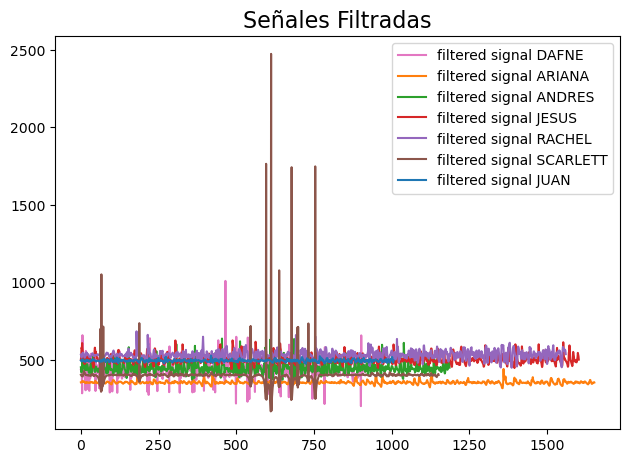

In [8]:
plt.plot(filtered1, 'tab:pink', label = 'filtered signal DAFNE')
plt.plot(filtered2, 'tab:orange', label = 'filtered signal ARIANA')
plt.plot(filtered3, 'tab:green', label = 'filtered signal ANDRES')
plt.plot(filtered4, 'tab:red', label = 'filtered signal JESUS ')
plt.plot(filtered5, 'tab:purple', label = 'filtered signal RACHEL')
plt.plot(filtered6, 'tab:brown', label = 'filtered signal SCARLETT')
plt.plot(filtered7, 'tab:blue', label = 'filtered signal JUAN')

# Ajustar espaciado
plt.tight_layout()


# Agregar un título global
plt.title('Señales Filtradas', fontsize=16)

# Ajustar el espaciado para el título global
plt.subplots_adjust(top=0.9)
plt.legend()
# Mostrar el plot
plt.show()

Observamos que la señal correspondiente a Scarlett nos esta haciendo complicado el proceso de visualización, es por ello que se ha decidido eliminar. Esta desición se ha sustentando en que es notorio que la señal no fue adquiriamente correctamente por lo que la señal esta compuesta por ruido con el cual de ahora en adelante ya no se trabajará.

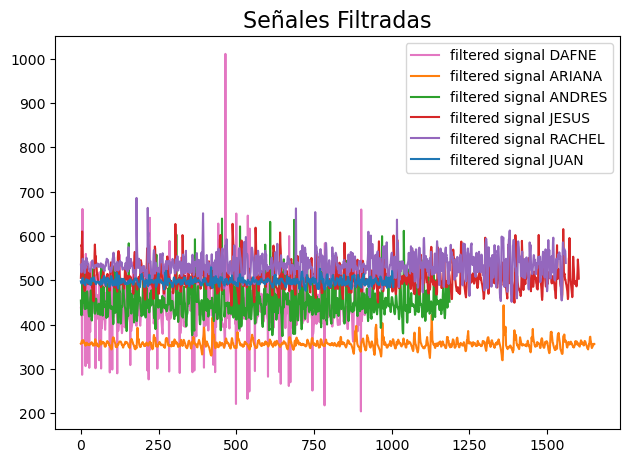

In [9]:
plt.plot(filtered1, 'tab:pink', label = 'filtered signal DAFNE')
plt.plot(filtered2, 'tab:orange', label = 'filtered signal ARIANA')
plt.plot(filtered3, 'tab:green', label = 'filtered signal ANDRES')
plt.plot(filtered4, 'tab:red', label = 'filtered signal JESUS ')
plt.plot(filtered5, 'tab:purple', label = 'filtered signal RACHEL')
plt.plot(filtered7, 'tab:blue', label = 'filtered signal JUAN')


# Ajustar espaciado
plt.tight_layout()


# Agregar un título global
plt.title('Señales Filtradas', fontsize=16)

# Ajustar el espaciado para el título global
plt.subplots_adjust(top=0.9)
plt.legend()
# Mostrar el plot
plt.show()

Ahora que podemos observar las seañles de manera grupal, se hace evidente el outlier de la señal de Dafne.
Notamos además, que aunque se realizó el filtrado, para las señal de Ariana no fue suficiente, ya que no se logró posicionar esta señal a la misma linea base que el resto de las señales. 

Eliminamos el valor outlier, sustituyendo su valor por el valor promedio de la señal el cual corresponde a 437

In [12]:
print(max(filtered1))
print(np.where(filtered1 == max(filtered1)))
print(np.mean(filtered1))
filtered1[465]=437  # valor a reemplazar


661.1811279051572
(array([5], dtype=int64),)
437.1617715523856


Mostramos nuevamente las señales, la señal Dafne filtrada 1 ya no contiene el pico outlier

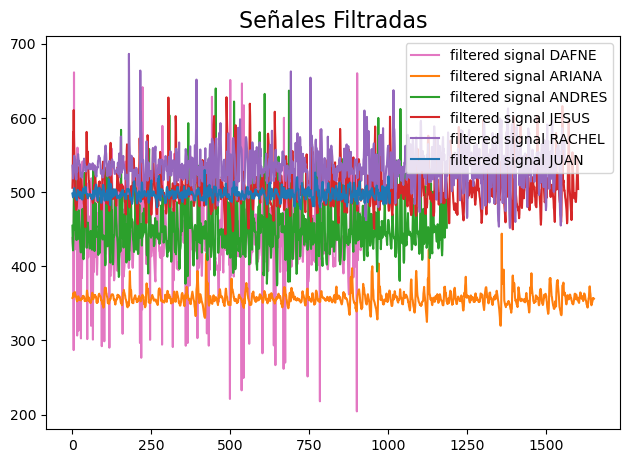

In [13]:
plt.plot(filtered1, 'tab:pink', label = 'filtered signal DAFNE')
plt.plot(filtered2, 'tab:orange', label = 'filtered signal ARIANA')
plt.plot(filtered3, 'tab:green', label = 'filtered signal ANDRES')
plt.plot(filtered4, 'tab:red', label = 'filtered signal JESUS ')
plt.plot(filtered5, 'tab:purple', label = 'filtered signal RACHEL')
plt.plot(filtered7, 'tab:blue', label = 'filtered signal JUAN')


# Ajustar espaciado
plt.tight_layout()


# Agregar un título global
plt.title('Señales Filtradas', fontsize=16)

# Ajustar el espaciado para el título global
plt.subplots_adjust(top=0.9)
plt.legend()
# Mostrar el plot
plt.show()

#   <font color='#FF0000'> Análisis en el dominio de la Frecuencia </font>

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

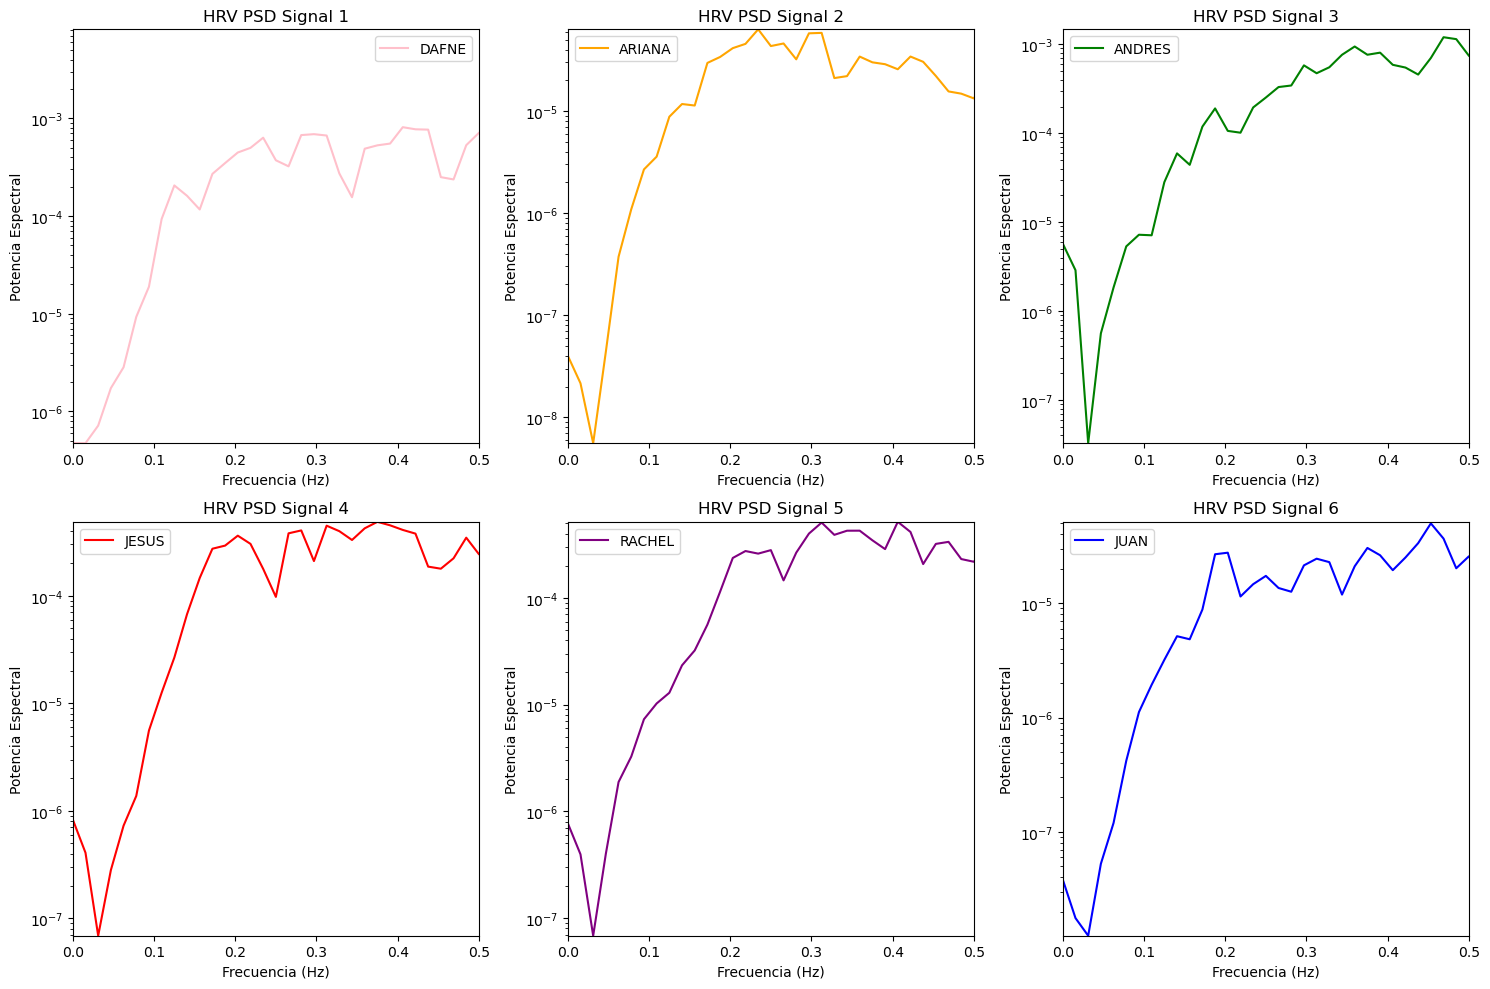

In [29]:

rr_signals = [filtered1, filtered2, filtered3, filtered4 , filtered5, filtered7]
label = ['DAFNE', 'ARIANA', 'ANDRES', 'JESUS', 'RACHEL', 'JUAN']
# Lista de colores para cada gráfico
colores = ['pink', 'orange', 'green', 'red', 'purple', 'blue']

# Crear subplots de 2x3
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()  # Convertir la matriz de ejes en una lista para facilitar el acceso

for i, rr_intervals in enumerate(rr_signals):
    # Convertir intervalos RR de milisegundos a segundos
    rr_intervals_seconds = rr_intervals / 1000.0

    # Calcular las diferencias entre intervalos RR consecutivos (delta RR)
    delta_rr_intervals = np.diff(rr_intervals_seconds)

    # Utilizar Welch's method para estimar la densidad espectral de potencia (PSD)
    frequencies, psd = welch(delta_rr_intervals, fs=4.0, nperseg=256, noverlap=128)

    # Visualización del PSD para identificar las bandas de frecuencia de HRV
    axes[i].semilogy(frequencies, psd, color=colores[i], label=label[i])
    axes[i].set_title(f'HRV PSD Signal {i+1}')
    axes[i].set_xlabel('Frecuencia (Hz)')
    axes[i].set_ylabel('Potencia Espectral')
    axes[i].set_xlim(0, 0.5)  # Limitar el eje x para enfocar en las bandas de interés de HRV
    axes[i].set_ylim(min(psd), max(psd))  # Ajustar el eje y para una mejor visualización
    axes[i].legend()  # Añadir leyenda al subplot


plt.tight_layout()
plt.show()


Usando la siguiente cita 


   <font color='blue'>"In 1999 Serrador et al demonstrated that the ULF band appears to be dominated by contributions from physical activity and that HRV in this band tends to increase during exercise. They
therefore assert that any study that assesses HRV using data (even partially) from this frequency band
should always include an indication of physical activity patterns."</font>

Partiendo de ese contexto podemos extrapolar a nuestro caso de estudio en donde los sujetos no fueron sometidos a actividad fisica, pero si lo fueron a estimulos de estrés, el cual esta relacionado con el incremento en la frecuencia cardiaca. 


 ###  <font color='pink'> Análisis señal DAFNE</font>

Analizando la señal en el dominio de la frecuencia, especificamente la potencia espectral podemos observar que:
- Se presenta un comportamiento estabilizador, es decir aunque se presentan pico en el aumento de la frecuencia el estimulo se estabiliza y se presentan valles los cuales se pueden interpretar como momentos de calama (dentro de los momentos de estrés)
- También se observa que los periodos entre los picos y los valles son medianamente equivalentes. 
- Observamos además que esta señal, fue una de las cuales presentaba picos prominentes en comparación con el resto de la señales, pero en su grafica espectral de potencia la amplitud no se ve reflejada a la alta

 ###  <font color='orange'> Análisis señal ARIANA</font>

Analizando la señal en el dominio de la frecuencia, especificamente la potencia espectral podemos observar que:
- Se inicia con un aumento en la frecuencia cardíaca, lo que se interpreta con un aumento en el nerviosismo
- La señal finaliza decreciente, por lo que podemos interpretar que al final de la sesión se logró controla el nerviosismo de manera significativa 
- Además es importane notar, que en el caso de potencia espectral su amplitud fue mayor respecto a la del resto, a pesar de que la señal filtra conservaba un offset que tenía la señal por debajo del nivel del resto de las señales. Es curioso este evento ya que se esperaria un comportamiento contrario al que se presentó

 ###  <font color='green'> Análisis señal ANDRES</font>

Analizando la señal en el dominio de la frecuencia, especificamente la potencia espectral podemos observar que:
- En caso contrario a loque ocurrio con Ariana podemos observar que el nerviosismo de Andres lejos de disminur aumentó al finalizar la sesión. 
- Se presentan considerables picos que reflejan que aumento en la frecuencia, podemos interpretar esto como variaciones importantes en el comportamiento del sujeto
- Observamos además que en todo momento se resento un aumento en la potencia, por lo que se puede interpretar que él es una persona ansiosa, sin importar las circunstancias



 ###  <font color='RED'> Análisis señal JESUS </font>

Analizando la señal en el dominio de la frecuencia, especificamente la potencia espectral podemos observar que:
- Se presentan una potencia alta por lo que se puede interpretar como un nerviosismo constante 
- Loss valles son practicamente nulos, por lo que podemos observar que no existieron momentos de relajación
- Por el final de la señal podemos observar un leve valle, pero seguido de el se presenta un pico, podemos interpretar que este sujeto termino la sesión bastante nervioso

 ###  <font color='PURPLE'> Análisis señal RACHEL</font>

Analizando la señal en el dominio de la frecuencia, especificamente la potencia espectral podemos observar que:
- Es evidente que esste sujeto inicio con un estado de relajación y este se mantuvo por un tiempo mayor comparado con el resto de los sujetos
- Una vez que este momento terminó el aumento en la grafica y los picos prominentes podemos observar que se terminó alterando el comportamiento que se había estado presentado con anterioridad
- Este sujeto de igual manera terminó la sesión en ascendente por o cual lo interpretamos como que terminó la sesión con bastante nerviosismo

 ###  <font color='BLUE'> Análisis señal JUAN</font>

Analizando la señal en el dominio de la frecuencia, especificamente la potencia espectral podemos observar que:
- Observamos que este sujeto al igual que Ariana presentarón una subida muy pronunciada en el espectro en potenca, por lo que se puede interpretar que este sujeto de gual manera inició bastante alerado en el ritmo cardíaco 
- Notamos además pcos y valles muy pronunciados, por lo que podemos apreciar que sufró de cambios notorios de estados en la duración de la sesión 
- Este sujeto al igual que la mayoría terminó la sesión en un estado bastante alterado. 

#   <font color='#FF0000'> Extra y trabajo a futuro</font>

###  <font color='#FF0000'> Usando la libreria hrv-analysis</font>

Se propone que como trabajo a futuro se emplee la librería hrv-analysis. 

El plan de trabajo que se propone es el siguiente:
- Adquirir las muestras mediante el sensor
- Generar un data frame utilizando la funcion: get_time_domain_features para el analisis en el dominio del tiempo. Utilizar la función: get_frequency_domain_features para el dominio de la frecuencia 
- Utilizar un metodo de machine learning

In [ ]:
#pip install hrv-analysis

In [48]:
from hrvanalysis import (get_time_domain_features, get_frequency_domain_features)

Esta funcion en el domio del tiempo genera: 

- Mean_NNI (Mean Normal-to-Normal Interval):
This is the average time between consecutive heartbeats. It provides a basic measure of your overall heart rate.


- SDNN (Standard Deviation of Normal-to-Normal Intervals):
This reflects the overall variability of your heart rate. A higher SDNN indicates greater variability, which is generally associated with a healthier heart and better autonomic nervous system function.


- SDSD (Standard Deviation of Differences of Successive Differences):
This focuses on the short-term variability of your heart rate, reflecting how much your heart rate changes beat-to-beat.


- NN50 (Number of Normal-to-Normal Intervals Differing by More Than 50ms):
This counts the number of times the interval between heartbeats changes by more than 50 milliseconds. A higher NN50 suggests greater influence from the parasympathetic nervous system, which is associated with relaxation and recovery.


- pNN50 (Percentage of NN50):
This expresses NN50 as a percentage of total NNI intervals. A higher pNN50 indicates a stronger parasympathetic influence.


- NN20 (Number of Normal-to-Normal Intervals Differing by More Than 20ms):
Similar to NN50, but with a lower threshold (20ms) to capture broader changes in heart rate variability.


- pNN20 (Percentage of NN20):
Similar to pNN50, but calculated using NN20 count.


- RMSSD (Root Mean Square of Successive Differences):
This reflects short-term heart rate variability similar to SDSD, but focuses on the squared differences between consecutive intervals.


- Median_NN (Median Normal-to-Normal Interval):
This is the middlemost value of all NNI intervals, representing a more robust measure of central tendency compared to the mean, which can be skewed by outliers.


- Range_NN (Difference Between Maximum and Minimum NNI):
This represents the overall range of your heart rate variability, calculated as the difference between the longest and shortest NNI.


- CVSD (Coefficient of Variation of Successive Differences):
This expresses RMSSD as a percentage of Mean_NNI, reflecting short-term variability relative to your average heart rate.


- CV_NNI (Coefficient of Variation of Normal-to-Normal Intervals):
Similar to CVSD, but uses the standard deviation of NNI instead of RMSSD.


- Mean_HR (Mean Heart Rate):
This is the average heart rate calculated over the entire recording period.


- Max_HR (Maximum Heart Rate):
This is the highest heart rate recorded during the measurement.


- Min_HR (Minimum Heart Rate):
This is the lowest heart rate recorded during the measurement.


- STD_HR (Standard Deviation of Heart Rate):
This reflects the variability of your heart rate over time, calculated as the standard deviation of all heart rate values within the recording.

In [49]:
#Otorga las features en el dominio del tiempo
print(get_time_domain_features(data1))


{'mean_nni': 561.9044516829533, 'sdnn': 83.49160066937807, 'sdsd': 76.06419640174907, 'nni_50': 165, 'pnni_50': 17.934782608695652, 'nni_20': 397, 'pnni_20': 43.15217391304348, 'rmssd': 76.06428202513976, 'median_nni': 556.0, 'range_nni': 855.0, 'cvsd': 0.1353687122380336, 'cvnni': 0.14858682898722972, 'mean_hr': 109.19766706506827, 'max_hr': 173.91304347826087, 'min_hr': 50.0, 'std_hr': 16.943558618171682}


Esta función en el dominio de la frecuencia genera: 
- LF (Low Frequency): This reflects the power of heart rate fluctuations between 0.04 and 0.15 Hz. It is influenced by both the sympathetic nervous system (fight-or-flight response) and parasympathetic nervous system (rest-and-digest response).

- HF (High Frequency): This reflects the power of heart rate fluctuations between 0.15 and 0.4 Hz. It is primarily influenced by the parasympathetic nervous system activity, indicating heart rate variability associated with respiration and relaxation.

- VLF (Very Low Frequency): This reflects the power of heart rate fluctuations below 0.04 Hz. It may be influenced by thermoregulation (body temperature control) and blood pressure control mechanisms. However, interpreting VLF is less established compared to LF and HF.

- LF/HF ratio: This is the ratio between the power of low-frequency (LF) and high-frequency (HF) fluctuations. It provides a simple way to assess the balance between sympathetic and parasympathetic nervous system activity. A higher ratio suggests a dominance of sympathetic activity, while a lower ratio indicates a stronger parasympathetic influence.

- LFnu (Low Frequency in Normalized Units): This expresses the power of LF as a percentage of the total power spectrum, providing a relative measure of LF activity.

- HFnu (High Frequency in Normalized Units): Similar to LFnu, but expresses the power of HF as a percentage of the total power spectrum, offering a relative measure of parasympathetic influence.

- Total Power: This represents the total power of all heart rate fluctuations across all frequencies analyzed (typically LF, HF, and VLF).

In [50]:
#Otorga las features en el dominio de la frecuencia 
print(get_frequency_domain_features(data1))


{'lf': 2929.170501931572, 'hf': 781.0613700507092, 'lf_hf_ratio': 3.750243725075534, 'lfnu': 78.94844858757013, 'hfnu': 21.051551412429873, 'total_power': 4822.095684860266, 'vlf': 1111.863812877985}


Análisis visuales de los componentes en frecuencia de cada señal :

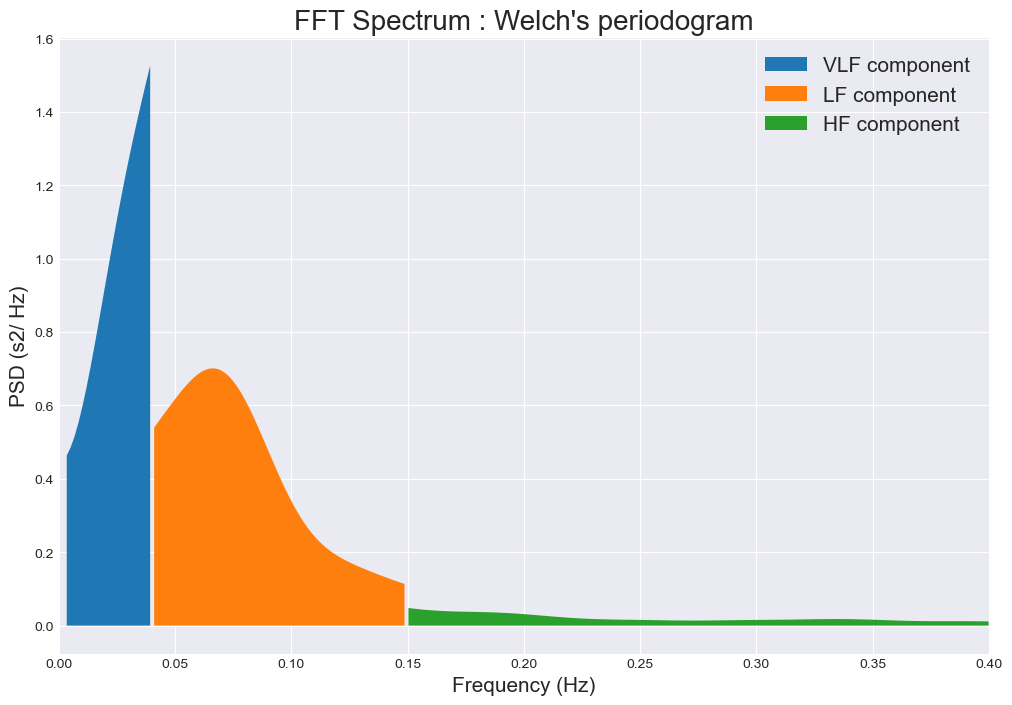

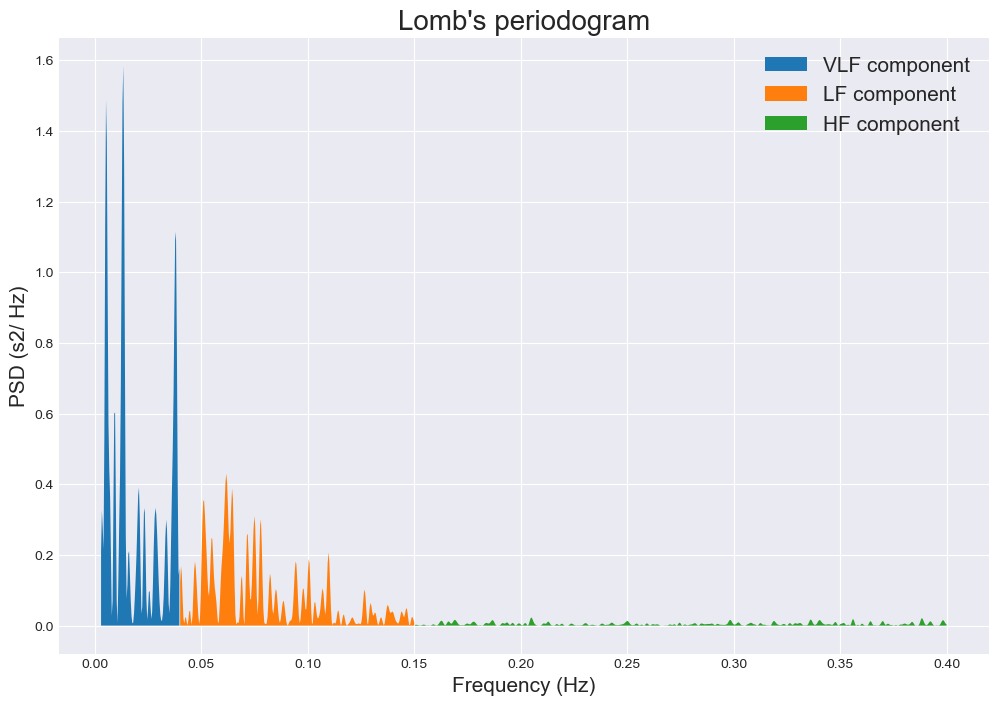

In [46]:
from hrvanalysis import plot_psd

plot_psd(data1, method="welch")
plot_psd(data1, method="lomb")


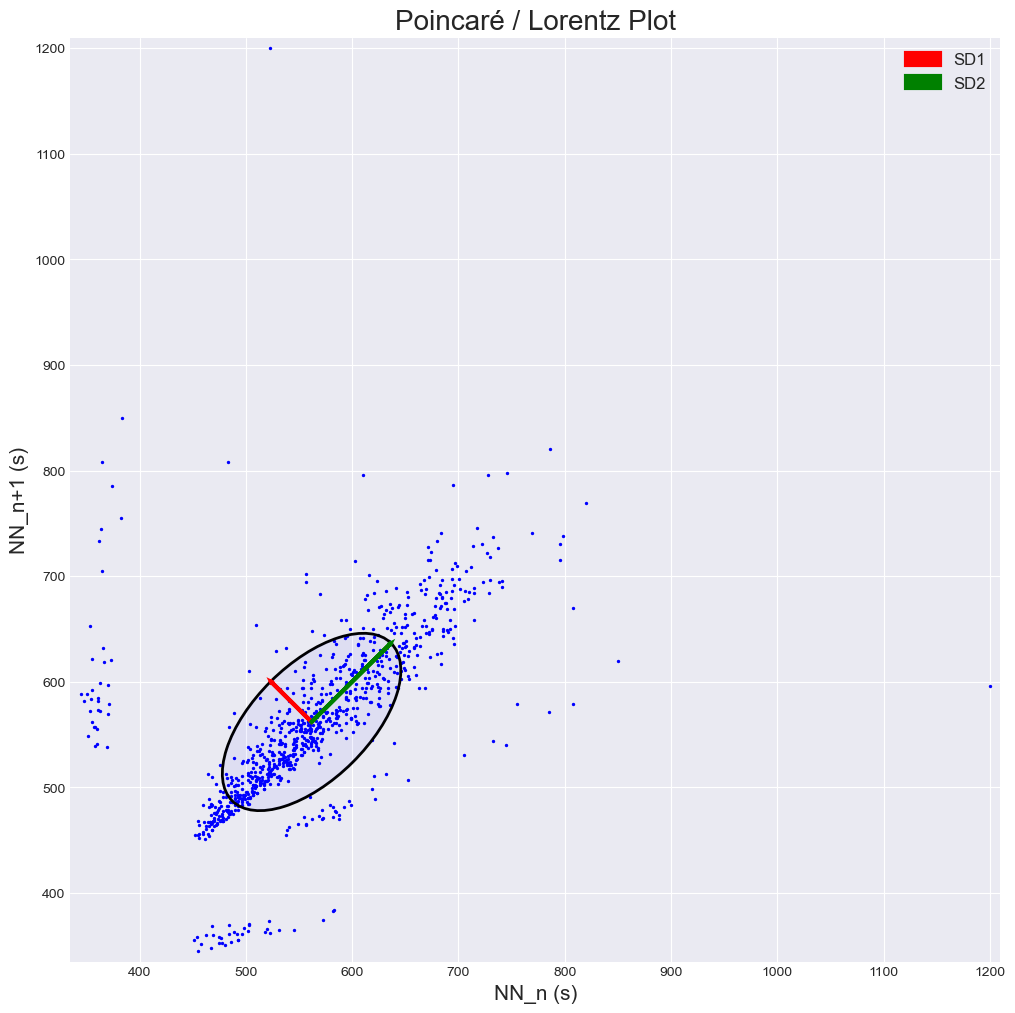

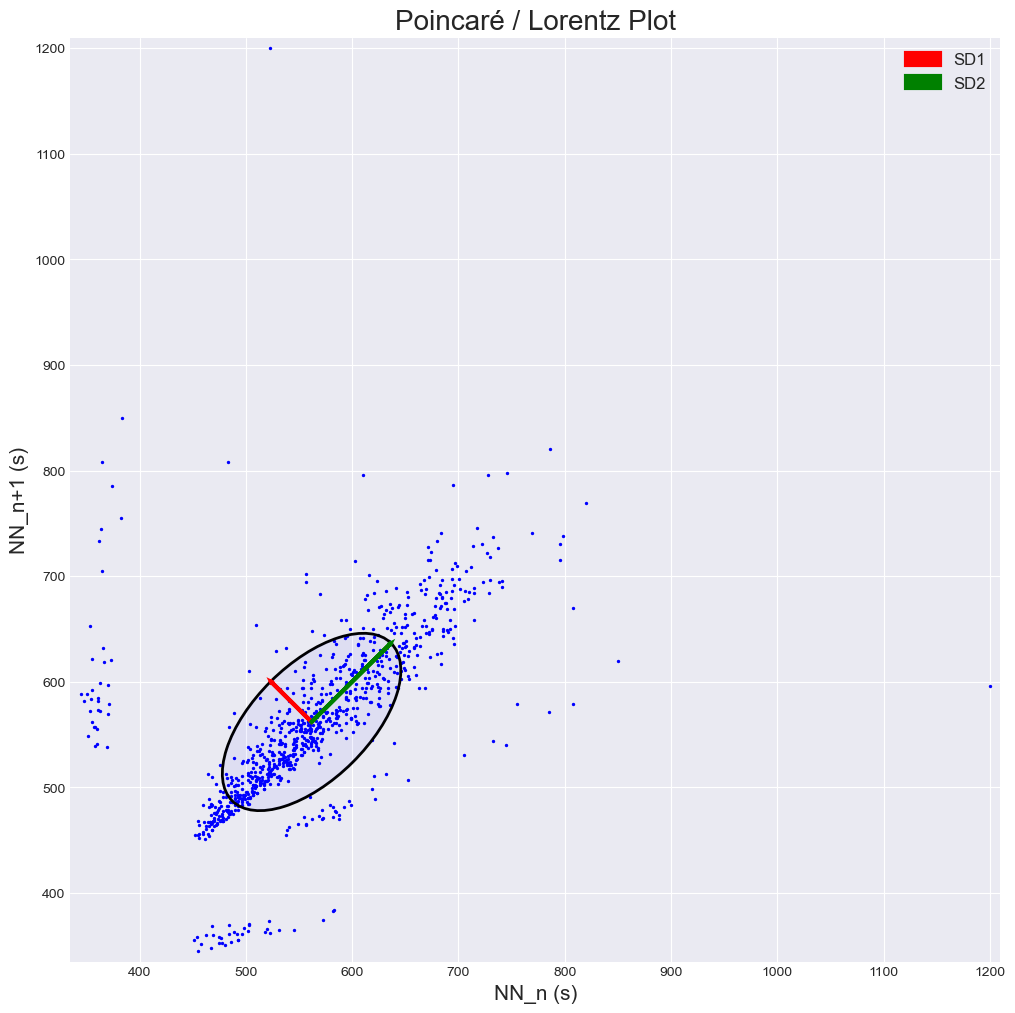

In [47]:
from hrvanalysis import plot_poincare



plot_poincare(data1)
plot_poincare(data1, plot_sd_features=True)